# Titanic Project

#### Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing and reading the dataset
data=pd.read_csv('5.Titanic.csv')

In [3]:
#Viewing the data inside the dataset
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


There is mixed data in the given dataset, i.e few columns have Numerical values and other Categorical and text.
also, we can see there are some missing values 

In [4]:
#Getting all the column names
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Shape of the data
data.shape

(891, 12)

Our dataset have 891 rows and 12 columns 

In [6]:
#Let us see the data types 
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#Checking for missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are missing values in columns : Age,Cabin and Embarked

In [8]:
#Embarked column
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [9]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

There are 3 elements inside Embarked - C, S, Q and nan

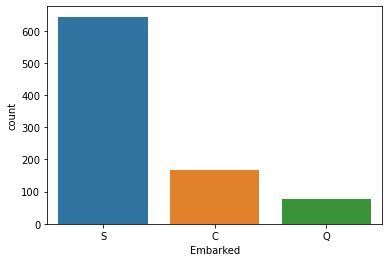

In [10]:
sns.countplot(data['Embarked'])

We can see majority of the passengers embarked at S.so let us replace the missing values with S

In [11]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

To see the count of each element in that column

In [12]:
#Checking the count of missing values
data['Embarked'].isnull().sum()

2

In [13]:
#Filling the 2 missing values with S
data['Embarked']=data['Embarked'].fillna('S')

In [14]:
#Checking for the null values in column  to confirm
data['Embarked'].isnull().sum()

0

In [15]:
#Checking the column cabin
data['Cabin'].isnull().sum()

687

In [16]:
#Number of unique values in the column
data['Cabin'].nunique()

147

In [17]:
#Adding the unique no of rooms and missing values
687+147

834

We can see that their sum is less than the tot. no. of rows - 891. i.e the cabin size / people in a cabin might be 1/2/3/4 .. based on the cabin capacity

We will leave the column as it is without filling the missing data, this is the best way.

In [18]:
#Checking the column age
data['Age'].isnull().sum()

177

177 rows are missing

In [19]:
data['Age'].nunique()

88

There are 88 unique age values in that column

In [20]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

From statistics we can see that :Mean and median are almost same, it might be normally distributed and the max. age of the person travelled is 80 yrs old which is a outlier

0.38910778230082704


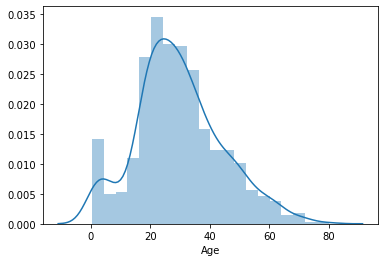

In [21]:
print(data['Age'].skew())
sns.distplot(data['Age'])

Slightly rightskewd , but in acceptable range. So let us fill the missing values with mean by rounding it down

In [22]:
#Filling the missing values 
data['Age']=data['Age'].fillna(data['Age'].median())

Filled the missing values with median, as mean = median if we rounded down the mean

In [23]:
#Verifying the missing values are filled or not
data['Age'].isnull().sum()

0

No missing values in the column now

In [24]:
#Checking any duplicates in the passengerid
data['PassengerId'].nunique()

891

No duplicates

In [25]:
#Checking the column survived
data['Survived'].unique()

array([0, 1], dtype=int64)

Only two elements 0 & 1

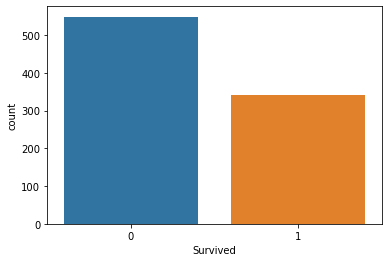

In [26]:
#Visualising the count of elements
sns.countplot(data['Survived'])

We can see that only few passengers survived

In [27]:
#Checking the count of survived
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Out of 891 passengers only 342 passengers survived. i.e 38% 

In [28]:
#Checking the Pclass
data['Pclass'].nunique()

3

There are 3 elements in Pclass column

In [29]:
#Checking the elements in Pclass
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

There are 3 passenger classes - 1,2 & 3

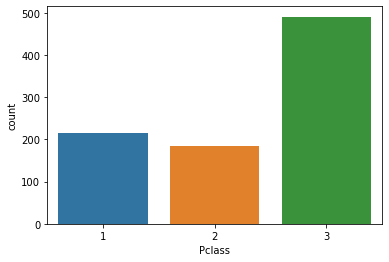

In [30]:
#Visualising no. of passengers in each class
sns.countplot(data['Pclass'])

From this we can see that majority of the passengers are travelling in 3rd class, and less passengers in second class

In [31]:
#Getting the counts of elements
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

We can see 491 passengers are 3rd class-55%, 216 are 1st class - 24% and 184 are 2nd class-21%.

In [32]:
#Checking column sex
data['Sex'].nunique()

2

There are only 2 elements in this column

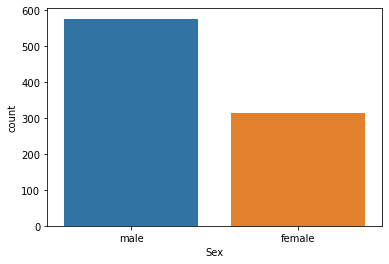

In [33]:
#Visualising the count of passengers gender
sns.countplot(data['Sex'])

Majority of passengers are Male

In [34]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

We can see that 577 people are male - 65% ,and remaining 314 are female -35%

In [35]:
#Checking column sibsp
data['SibSp'].nunique()

7

There are 7 elements in this column 

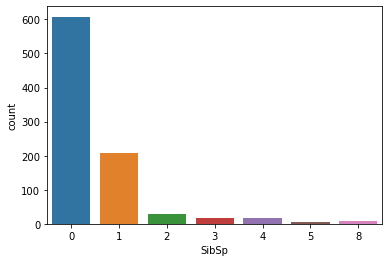

In [36]:
sns.countplot(data['SibSp'])

Majority of passengers doesn't have sibblings/sisters or might be not travelled with them 

In [37]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

We can see number of passengers travelled along with their sibblings and how many sibblings they had

In [38]:
#Checking the column Parch
data['Parch'].nunique()

7

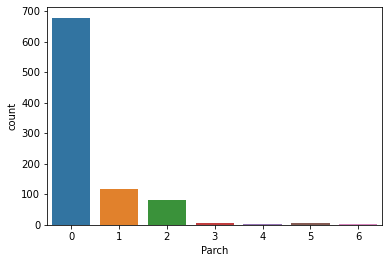

In [39]:
sns.countplot(data['Parch'])

Majority of passengers traveled alone without parents/children

In [40]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Count of the travellers with no. of parents/child along with them

In [41]:
#Checking the ticket column
data['Ticket'].nunique()

681

There are only 681 unique tickets out of 891 passengers but we seen no duplicate passenger id, therefore it might be due to :
    1) Family members/siblings might be traveling on same ticket number. i.e multiple persons in a single ticket number

In [42]:
#Checking the fare column
data['Fare'].nunique()

248

There 248 different fares - Difference might be due to class, embarked station, group tickets, amenities they choosen etc.

In [43]:
#Least and Highest fare
print('Least Fare:',data['Fare'].min())
print('Highest Fare:',data['Fare'].max())

Least Fare: 0.0
Highest Fare: 512.3292


Least fare is 0.0: from this we can assume- data not recorded or might be given free tickets as complimentary

In [44]:
#Checking how many travelled with 0.0 fare
free=[]
for i in data['Fare']:
    if i==0:
        free.append(i) 
print(len(free))

15


15 people traveled with 0 fare.

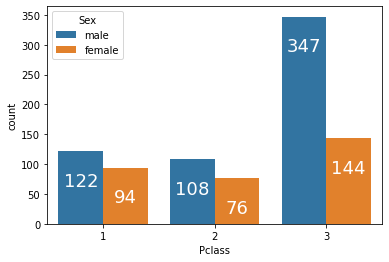

In [45]:
#Visualising how many male and female are present in each passenger class
ax=sns.countplot(x="Pclass", hue="Sex", data=data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

We can see in each class , male are more than female

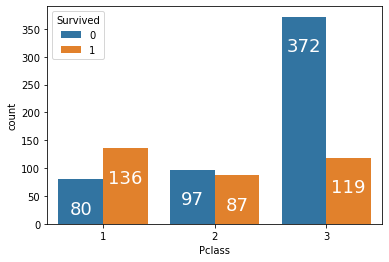

In [46]:
#Checking for how many survived in each class
ax=sns.countplot(x="Pclass", hue="Survived", data=data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

We can see the max no.of people survived are from class 1 , class 3 and class 2

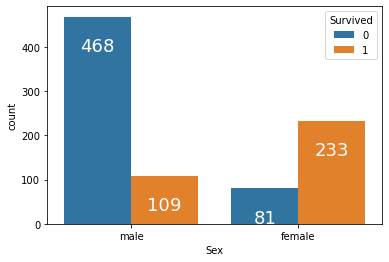

In [47]:
#Checking how many male and female survived 
ax=sns.countplot(x="Sex", hue="Survived", data=data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

We can see female survived more than male

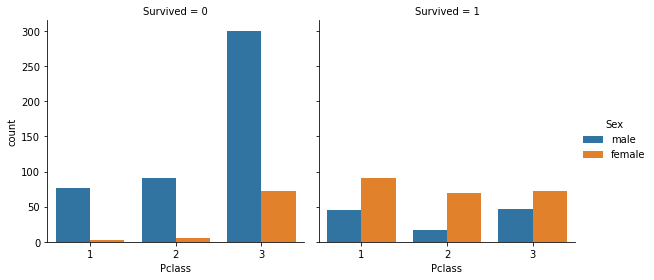

In [48]:
#Checking how many number of male and female survived in each class
ax=sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=data, kind="count",
                height=4, aspect=1);

We can see majority of female survived are from 1st class 
Very less number of female died in class 1 and class 2 than compared to class 3

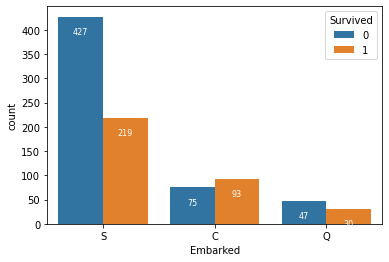

In [49]:
#Checking the port embarked and survival
ax=sns.countplot(x="Embarked", hue="Survived", data=data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=8)

We can see that majority of survivors are embarked at port S

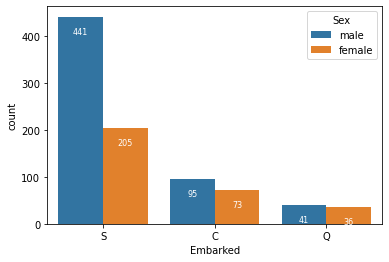

In [50]:
#Checking how many male and female embarked at each station
ax=sns.countplot(x="Embarked", hue="Sex", data=data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=8)

Majority of Passengers embarked at station S 

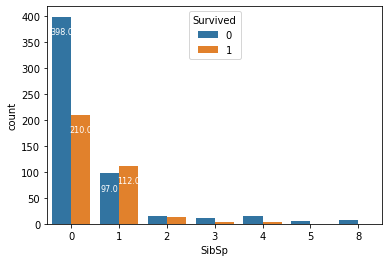

In [51]:
#Checking how many passengers having sibblings on board survived
ax=sns.countplot(x="SibSp", hue="Survived", data=data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=8)

Majority of passengers who survived are having one sibbling or no sibblings

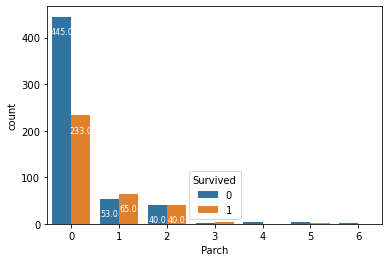

In [52]:
ax=sns.countplot(x="Parch", hue="Survived", data=data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=8)

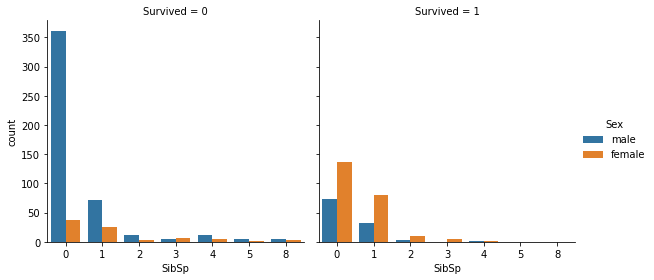

In [53]:
#Seeing the gender of how many passengers with SibSp survived or not 
ax=sns.catplot(x="SibSp", hue="Sex", col="Survived",
                data=data, kind="count",
                height=4, aspect=1);

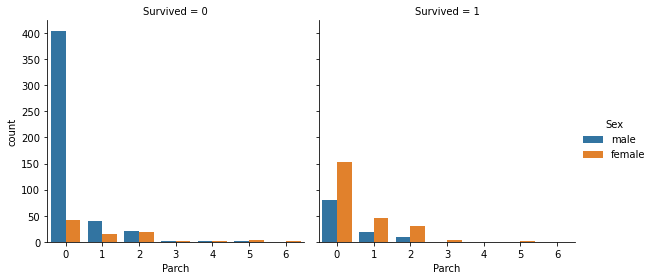

In [54]:
#Checking gender wise count of how many survived with no.of parents or child
g=sns.catplot(x="Parch", hue="Sex", col="Survived",
                data=data, kind="count",
                height=4, aspect=1);

In [55]:
#let us see the statistical summary  , before that let us encode the columns Sex & Embarked
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

Encoded as :
Male - 1
Female - 0

In [56]:
#Simillarly encoding the column Embarked
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [57]:
le=LabelEncoder()
data['Embarked']=le.fit_transform(data['Embarked'])
data['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

We can see,they are encoded as 
S - 2
C - 0
Q - 1

In [58]:
#Removing unnecessary columns i.e - Name, Cabin and Ticket
df=data.drop(['Name','Cabin','Ticket'],axis=1)

In [59]:
#Removing column passenger id
df=df.drop('PassengerId',axis=1)

In [60]:
#Checking the shape of df
df.shape

(891, 8)

We can see now 3 columns are removed.

In [61]:
#let us see the statistical summary
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Survived       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Pclass      AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Sex         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Age         AxesSubplot(0.731522,0.536818;0.168478x0.343182)
SibSp             AxesSubplot(0.125,0.125;0.168478x0.343182)
Parch          AxesSubplot(0.327174,0.125;0.168478x0.343182)
Fare           AxesSubplot(0.529348,0.125;0.168478x0.343182)
Embarked       AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

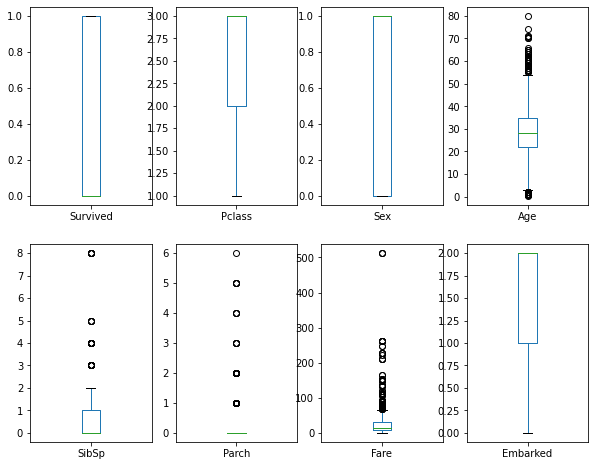

In [62]:
#Checking for outliers
df.plot(kind='box',subplots=True,figsize=(10,8),layout=(2,4))

Outliers are present in age,SibSp,Parch and fare

In [63]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.50244517,
        0.58595414],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.47367361, 0.78684529,
        1.9423032 ],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.47367361, 0.48885426,
        0.58595414],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 2.00893337, 0.17626324,
        0.58595414],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.47367361, 0.04438104,
        1.9423032 ],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.49237783,
        0.67817453]])

In [64]:
df=df[(z<3).all(axis=1)]

In [65]:
df.shape

(820, 8)

after removing outliers we have 820 rows, 

In [66]:
(1-(820/891))*100

7.968574635241299

We lost around 8% of data. Acceptable range.


In [67]:
#Let us check the skewness
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

Since this is a classification problem , we can remove skewness only in columns with continuous data. So here we will remove skewness in fare

Skewness: 2.318760976737288


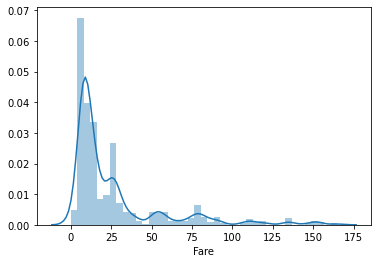

In [68]:
#Removing skewness in column Fare
sns.distplot(df['Fare'])
print('Skewness:',df['Fare'].skew())

In [70]:
#Using log transform to reduce skewness. since the column has 0 we are adding constant 1 to all values in the column
df['Fare']=np.log(df['Fare']+1)
df['Fare'].skew()

0.19636409783591077

Skewness reduced from 2.3 to 0.2

In [71]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [72]:
#Let us split the data into x and y
x=df.drop('Survived',axis=1)
y=df['Survived']

In [73]:
#Let us balance the dataset 
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [74]:
y.shape

(1000,)

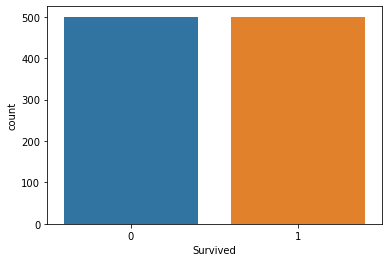

In [75]:
sns.countplot(y)

Now the data of both survived and not survived are balanced
The new shape is 1000 rows , 8 columns 

In [76]:
#Scaling the features in the dataset
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

Now the data is scaled

In [77]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.322306,-0.554888,-0.086026,0.094459,0.201071,0.367300,-0.154994
Pclass,-0.322306,1.000000,0.138041,-0.336981,-0.052312,-0.078366,-0.695330,0.122145
Sex,-0.554888,0.138041,1.000000,0.091656,-0.199204,-0.251872,-0.271793,0.116708
Age,-0.086026,-0.336981,0.091656,1.000000,-0.143912,-0.251772,0.152181,0.001121
SibSp,0.094459,-0.052312,-0.199204,-0.143912,1.000000,0.307210,0.343420,-0.013767
Parch,0.201071,-0.078366,-0.251872,-0.251772,0.307210,1.000000,0.311910,-0.016184
Fare,0.367300,-0.695330,-0.271793,0.152181,0.343420,0.311910,1.000000,-0.183921
Embarked,-0.154994,0.122145,0.116708,0.001121,-0.013767,-0.016184,-0.183921,1.000000


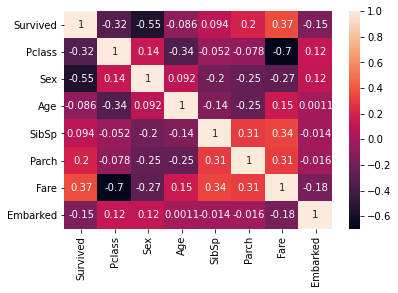

In [79]:
sns.heatmap(df.corr(),annot=True)

Now our data is ready to send for the model to train and test

In [83]:
#Let us import required libraries for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [84]:
#Finding the best random_state
lr=LogisticRegression()
max=0
rs=0
for i in range(1001):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    score=accuracy_score(y_test,pred)
    if max<score:
        max=score
        rs=i
print('Max score is: ',max,' at random state -',rs)
    
    

Max score is:  0.888  at random state - 75


Random state 75 is giving us the best accuracy score - i.e 88%

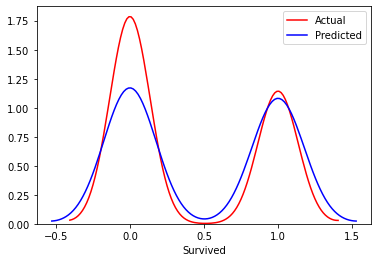

In [89]:
#Visualising the fitting of the model - wether overfit or underfit
ax1=sns.distplot(df['Survived'],hist=False,color='r',label='Actual')
sns.distplot(pred,hist=False,color='b',label='Predicted',ax=ax1)

Model of logistic regression is under fitting, almost correct for the element 1 , but huge error in predicting element 0

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=75)

In [87]:
#Let us import different models and metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [96]:
#Making instance of each model
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
svc=SVC()
knn=KNeighborsClassifier()

In [98]:
#Making a list of models 
models=[lr,dtc,gnb,svc,knn]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(f'The accuracy score of {m} is :',accuracy_score(y_test,predm))
    print(f'The confusion matrix of {m} is:\n',confusion_matrix(y_test,predm))
    print(f'The classification report of {m} is :\n',classification_report(y_test,predm))
    print('\n')

The accuracy score of LogisticRegression() is : 0.888
The confusion matrix of LogisticRegression() is:
 [[110  14]
 [ 14 112]]
The classification report of LogisticRegression() is :
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       124
           1       0.89      0.89      0.89       126

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



The accuracy score of DecisionTreeClassifier() is : 0.836
The confusion matrix of DecisionTreeClassifier() is:
 [[103  21]
 [ 20 106]]
The classification report of DecisionTreeClassifier() is :
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       124
           1       0.83      0.84      0.84       126

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.

From these logistic regression is giving the best accuracy score

In [100]:
#Let us check with the cv score
from sklearn.model_selection import cross_val_score
for m in models:
    cvscore=cross_val_score(m,x,y,cv=10)
    print(f'Metrics of model {m}')
    print(cvscore)
    print(f'Mean cv score: ',cvscore.mean())
    print(cvscore.std())
    print('\n')

Metrics of model LogisticRegression()
[0.78 0.76 0.85 0.76 0.72 0.75 0.84 0.87 0.82 0.86]
Mean cv score:  0.8009999999999999
0.050487622245457345


Metrics of model DecisionTreeClassifier()
[0.72 0.77 0.77 0.74 0.74 0.79 0.89 0.86 0.85 0.82]
Mean cv score:  0.795
0.05463515351859094


Metrics of model GaussianNB()
[0.69 0.73 0.83 0.75 0.74 0.73 0.81 0.85 0.85 0.83]
Mean cv score:  0.7809999999999999
0.05593746508378799


Metrics of model SVC()
[0.82 0.78 0.86 0.78 0.73 0.79 0.85 0.89 0.91 0.85]
Mean cv score:  0.826
0.05314132102234569


Metrics of model KNeighborsClassifier()
[0.76 0.77 0.88 0.76 0.78 0.79 0.85 0.88 0.86 0.84]
Mean cv score:  0.817
0.04712748667179271




By comparing accuracy_score and cv score :
    The best model is - Knn though the difference b/w cv score and f1 score is same , knn has the least std.
    

In [102]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(f'The accuracy score of knn is :',accuracy_score(y_test,predm))
print(f'The confusion matrix of knn is:\n',confusion_matrix(y_test,predm))
print(f'The classification report of knn is :\n',classification_report(y_test,predm))

The accuracy score of knn is : 0.856
The confusion matrix of knn is:
 [[105  19]
 [ 17 109]]
The classification report of knn is :
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       124
           1       0.85      0.87      0.86       126

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



In [105]:
#Hyper parameter tuning of knn  model using GridSearchCV
from sklearn.model_selection import GridSearchCV
par={'n_neighbors':[1,5,10,15,20,30,40,50],'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,30,50,80],'p':[1,2]}
grid=GridSearchCV(knn,param_grid=par)
grid.fit(x_train,y_train)
print('Best score:',grid.best_score_)
print('Best Estimator:',grid.best_estimator_)
print('Best parameter:',grid.best_params_)


Best score: 0.8053333333333332
Best Estimator: KNeighborsClassifier(leaf_size=10, n_neighbors=15)
Best parameter: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}


In [110]:
#We got the best parmeters. 
best_model=KNeighborsClassifier(algorithm='auto', leaf_size= 10, n_neighbors= 15, p= 2, weights= 'uniform')
best_model.fit(x_train,y_train)
predb=best_model.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predb))
print('Confusion matrix:\n',confusion_matrix(y_test,predb))
print('classification report:\n',classification_report(y_test,predb))


Accuracy Score 0.884
Confusion matrix:
 [[109  15]
 [ 14 112]]
classification report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       124
           1       0.88      0.89      0.89       126

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



Now the accuracy is 88%

In [111]:
#Making a data frame to see the values actual and predicted
results=pd.DataFrame({})
results['Actual']=y_test
results['Predicted']=predb

In [112]:
results

,Actual,Predicted
16,0,1
955,1,1
750,0,0
82,0,0
215,1,1
...,...,...
176,0,0
585,0,0
371,0,0
173,1,1


We can see majority of the rows are predicted correct

In [113]:
#plotting the auc _ roc curve
from sklearn.metrics import roc_auc_score
#Predicting the probability of having 1 in the x-test
y_pred_prob=best_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.53333333, 0.6       , 0.33333333, 0.26666667, 0.93333333,
       0.2       , 0.26666667, 0.4       , 1.        , 0.8       ,
       0.13333333, 0.26666667, 0.6       , 0.06666667, 0.8       ,
       1.        , 0.66666667, 0.13333333, 0.        , 0.13333333,
       0.93333333, 0.93333333, 0.33333333, 0.2       , 0.26666667,
       0.6       , 1.        , 0.8       , 1.        , 0.86666667,
       0.6       , 0.93333333, 0.8       , 0.53333333, 0.06666667,
       0.26666667, 1.        , 0.93333333, 1.        , 0.13333333,
       1.        , 0.4       , 1.        , 0.6       , 0.8       ,
       1.        , 0.53333333, 0.26666667, 1.        , 0.6       ,
       0.93333333, 0.13333333, 0.13333333, 0.26666667, 0.4       ,
       0.4       , 0.13333333, 0.66666667, 0.06666667, 1.        ,
       0.33333333, 0.73333333, 0.86666667, 0.86666667, 0.2       ,
       1.        , 0.93333333, 0.73333333, 0.8       , 0.2       ,
       0.06666667, 0.66666667, 0.93333333, 0.26666667, 0.8    

In [115]:
#Visualising
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

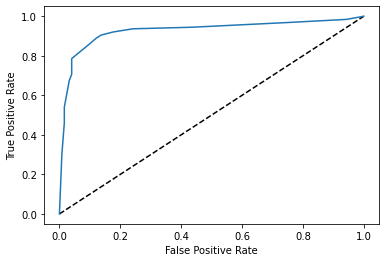

Score: 0.8839605734767024


In [117]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,best_model.predict(x_test))
print('Score:',auc_score)

We can see our model is 88% accurate.

In [118]:
#Let us save the best model
import joblib
joblib.dump(best_model,'5.Titanic.obj')

['5.Titanic.obj']